In [4]:
import pandas as pd
!pip install pandas matplotlib seaborn sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print('import')

import


In [7]:
path = r"C:\Users\Digital Suppliers\Documents\Amazon_Sales\Amazon India Complete.csv"
df = pd.read_csv(path)
print("done")

done


In [8]:
df.columns


Index(['Transaction Id', 'Order Date', 'Customer Id', 'Product Id',
       'Product Name', 'Category', 'Subcategory', 'Brand',
       'Original Price Inr', 'Discount Percent', 'Discounted Price Inr',
       'Quantity', 'Subtotal Inr', 'Delivery Charges', 'Final Amount Inr',
       'Customer City', 'Customer State', 'Customer Tier',
       'Customer Spending Tier', 'Customer Age Group', 'Payment Method',
       'Delivery Days', 'Delivery Type', 'Is Prime Member', 'Is Festival Sale',
       'Festival Name', 'Customer Rating', 'Return Status', 'Order Month',
       'Order Year', 'Order Quarter', 'Product Weight Kg', 'Is Prime Eligible',
       'Product Rating'],
      dtype='object')

In [9]:
df['Delivery Charges'].value_counts()


Delivery Charges
0.0     1127601
40.0          8
Name: count, dtype: int64

C:\Users\Digital Suppliers\AppData\Local\Temp\ipykernel_3328\134517425.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( data=delivery_charge, x='Customer State', y='Delivery Charges', hue='Customer Tier', palette='Set2', ci=None)


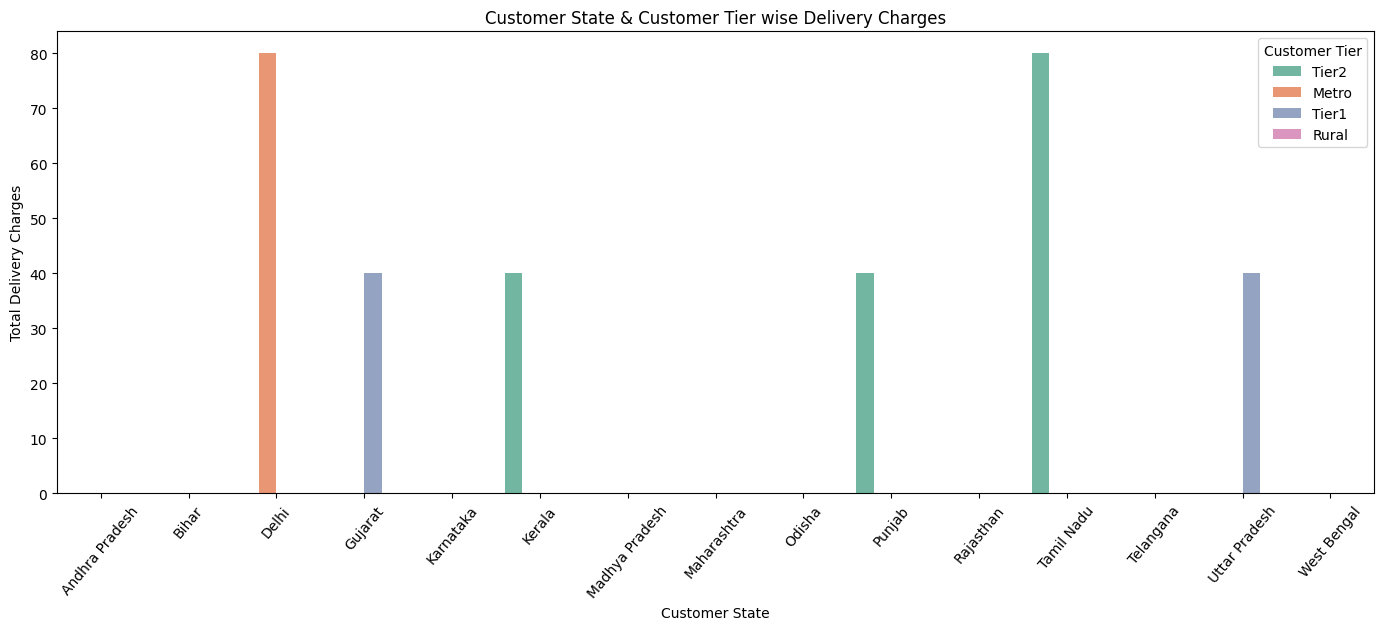

In [11]:
delivery_charge = df.groupby(['Customer State', 'Customer Tier'])['Delivery Charges'].sum().reset_index()
plt.figure(figsize=(17,6))
sns.barplot( data=delivery_charge, x='Customer State', y='Delivery Charges', hue='Customer Tier', palette='Set2', ci=None)
plt.title("Customer State & Customer Tier wise Delivery Charges")
plt.ylabel('Total Delivery Charges')
plt.xlabel('Customer State')
plt.xticks(rotation=50)
plt.show()

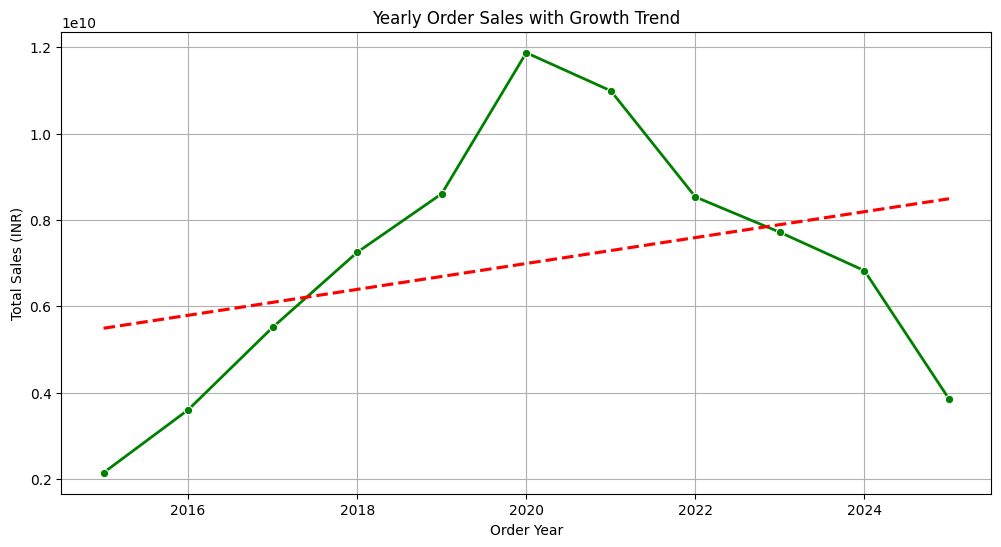

In [12]:
yearly_sales = df.groupby('Order Year')['Final Amount Inr'].sum().reset_index()
yearly_sales['Growth %'] = yearly_sales['Final Amount Inr'].pct_change() * 100
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sales, x='Order Year', y='Final Amount Inr', marker='o', linewidth=2, color='green')
sns.regplot(data=yearly_sales, x='Order Year', y='Final Amount Inr', scatter=False, ci=None, color='red', line_kws={"linestyle":"--"})
plt.title("Yearly Order Sales with Growth Trend")
plt.xlabel("Order Year")
plt.ylabel("Total Sales (INR)")
plt.grid(True)
plt.show()

C:\Users\Digital Suppliers\AppData\Local\Temp\ipykernel_3328\597430508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sum_final, x='Order Month', y='Final Amount Inr', palette='Set3')


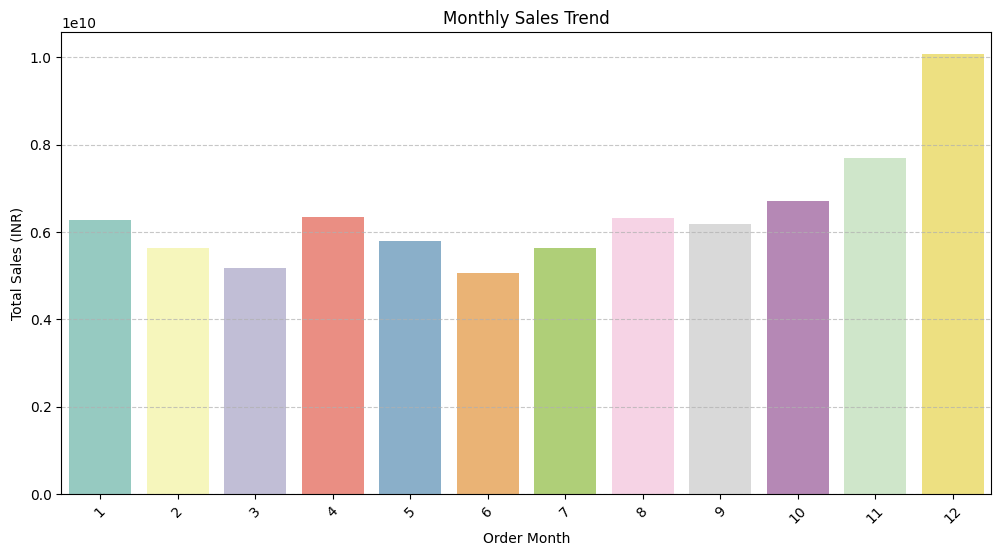

In [13]:
sum_final = df.groupby('Order Month', as_index=False)['Final Amount Inr'].sum()
plt.figure(figsize=(12,6))
sns.barplot(data=sum_final, x='Order Month', y='Final Amount Inr', palette='Set3')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (INR)")
plt.xlabel("Order Month")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

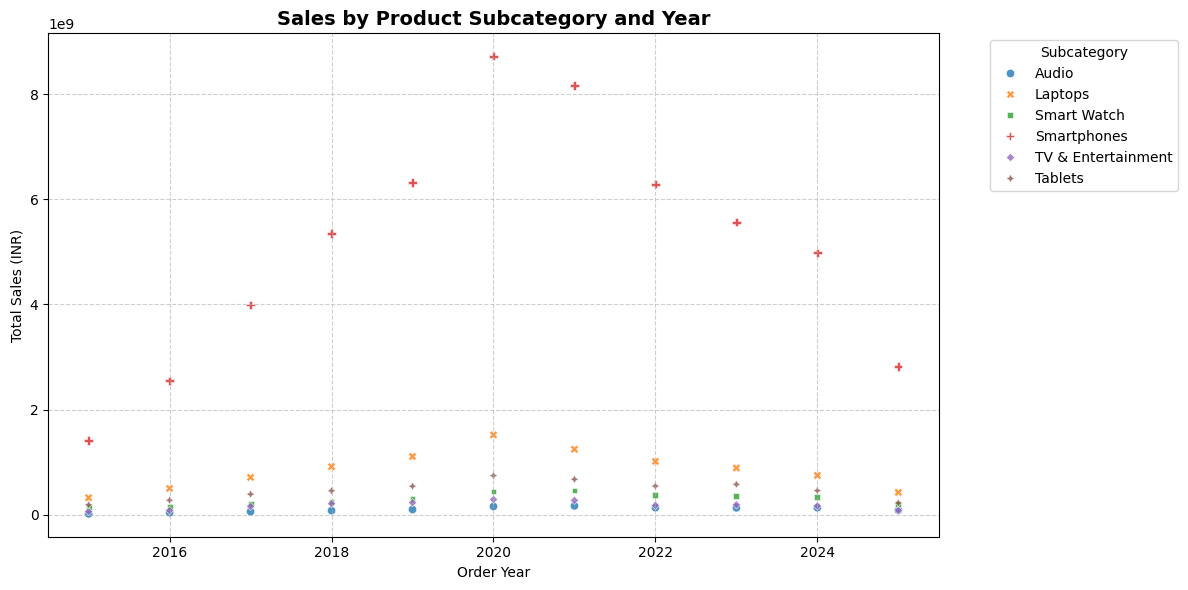

In [14]:
group_by = df.groupby(['Order Year', 'Subcategory'])['Final Amount Inr'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.scatterplot(data=group_by, x='Order Year', y='Final Amount Inr', hue='Subcategory', style='Subcategory', alpha=0.8 )
plt.title("Sales by Product Subcategory and Year", fontsize=14, fontweight='bold')
plt.xlabel("Order Year")
plt.ylabel("Total Sales (INR)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Subcategory", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Digital Suppliers\AppData\Local\Temp\ipykernel_3328\1702397021.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment Method', palette='Set2')


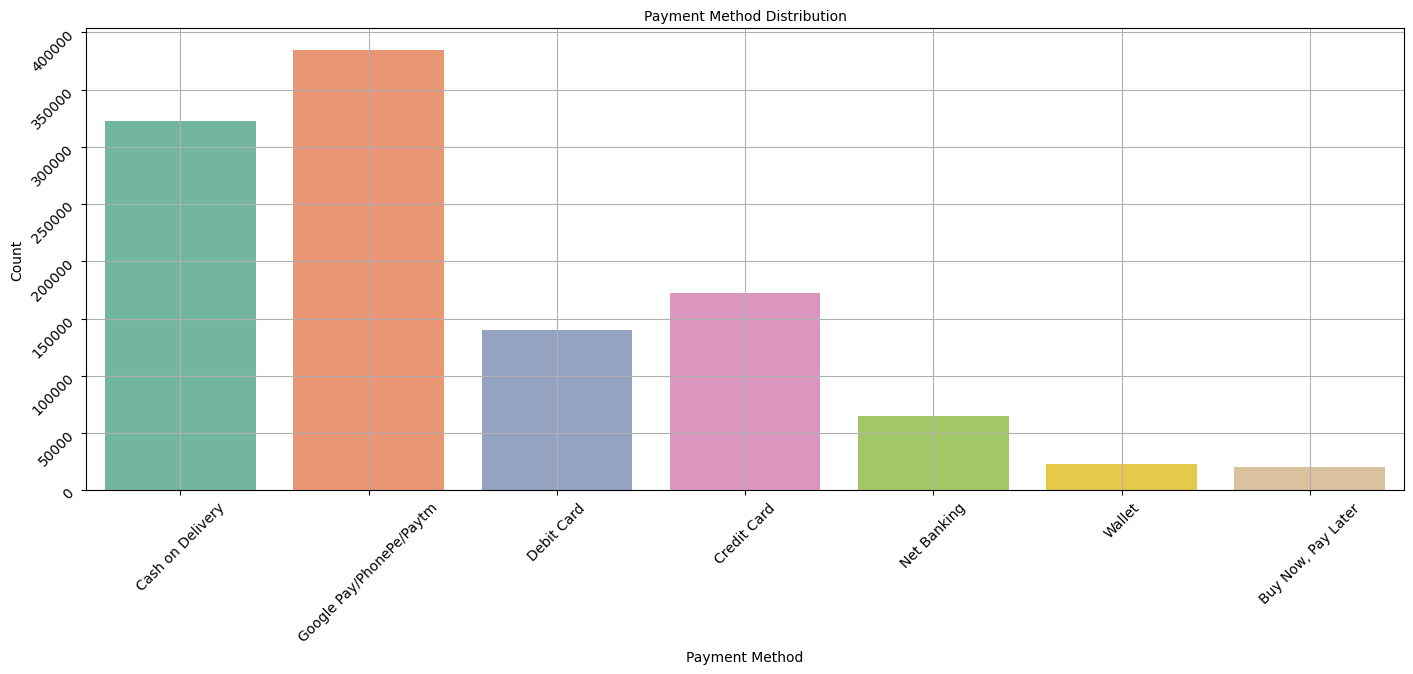

In [15]:
plt.figure(figsize=(17,6))
sns.countplot(data=df, x='Payment Method', palette='Set2')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=45, fontsize=10)
plt.xlabel("Payment Method", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title("Payment Method Distribution", fontsize=10)
plt.grid()
plt.show()

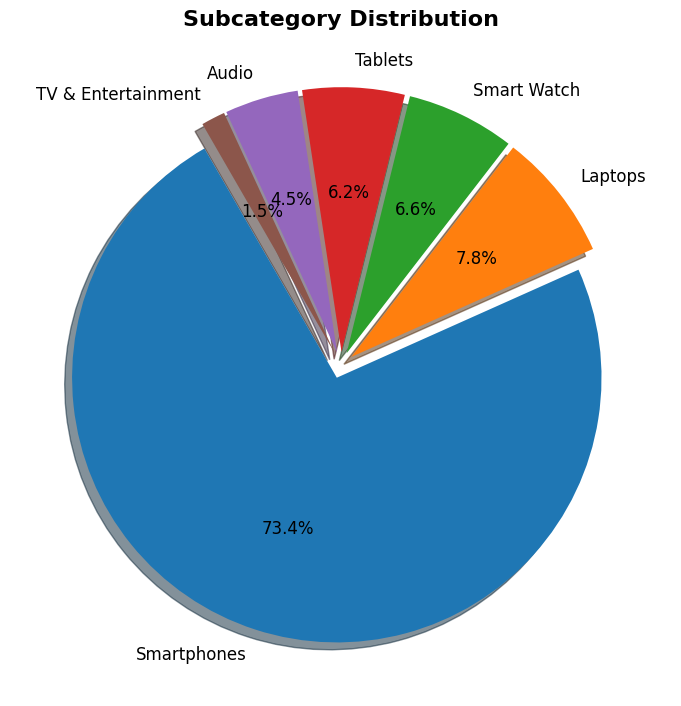

In [16]:
brand = df['Subcategory'].value_counts()
plt.figure(figsize=(7,8))
plt.pie(brand,labels=brand.index,autopct="%1.1f%%",   startangle=120, shadow=True, explode=[0.05]*len(brand), textprops={'fontsize': 12} )
plt.title("Subcategory Distribution", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

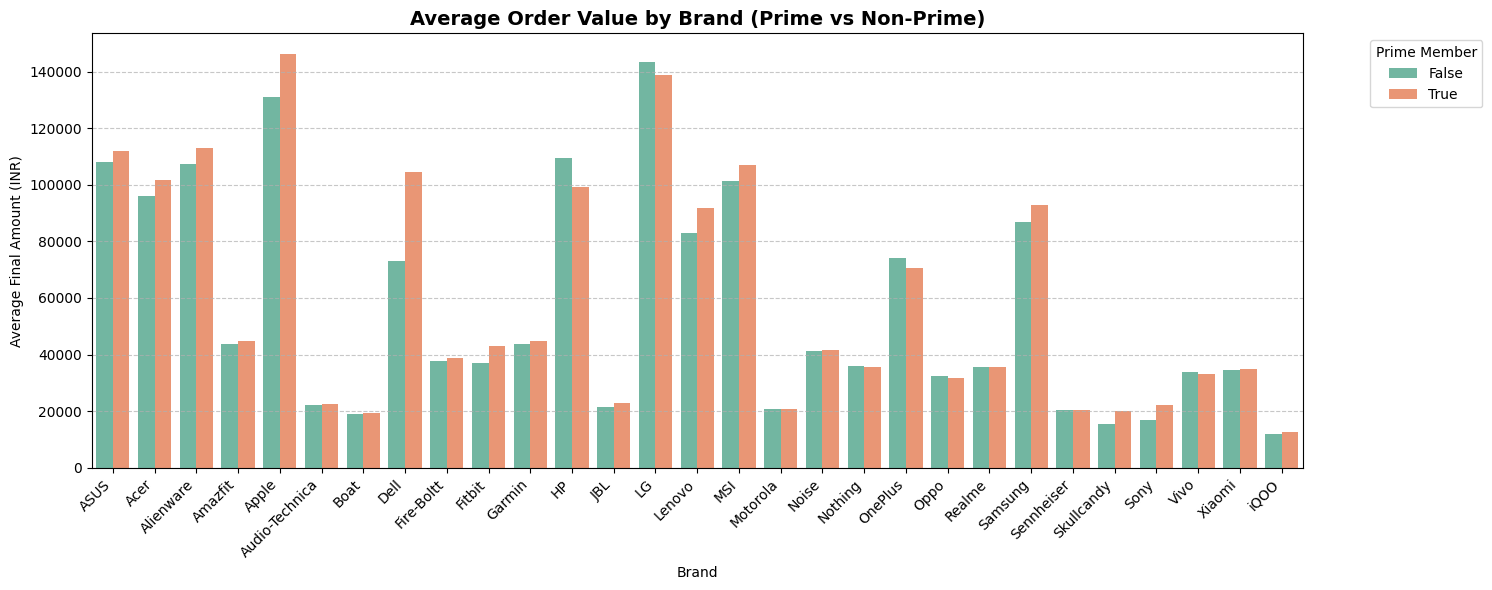

In [17]:
prime_member = df.groupby(['Brand', 'Is Prime Member'])['Final Amount Inr'].mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data=prime_member,x='Brand',y='Final Amount Inr',hue='Is Prime Member',palette='Set2')
plt.title("Average Order Value by Brand (Prime vs Non-Prime)", fontsize=14, fontweight='bold')
plt.xlabel("Brand")
plt.ylabel("Average Final Amount (INR)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.legend(title="Prime Member", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Digital Suppliers\AppData\Local\Temp\ipykernel_3328\1758929964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Customer State',palette='Set1',order=df['Customer State'].value_counts().index )


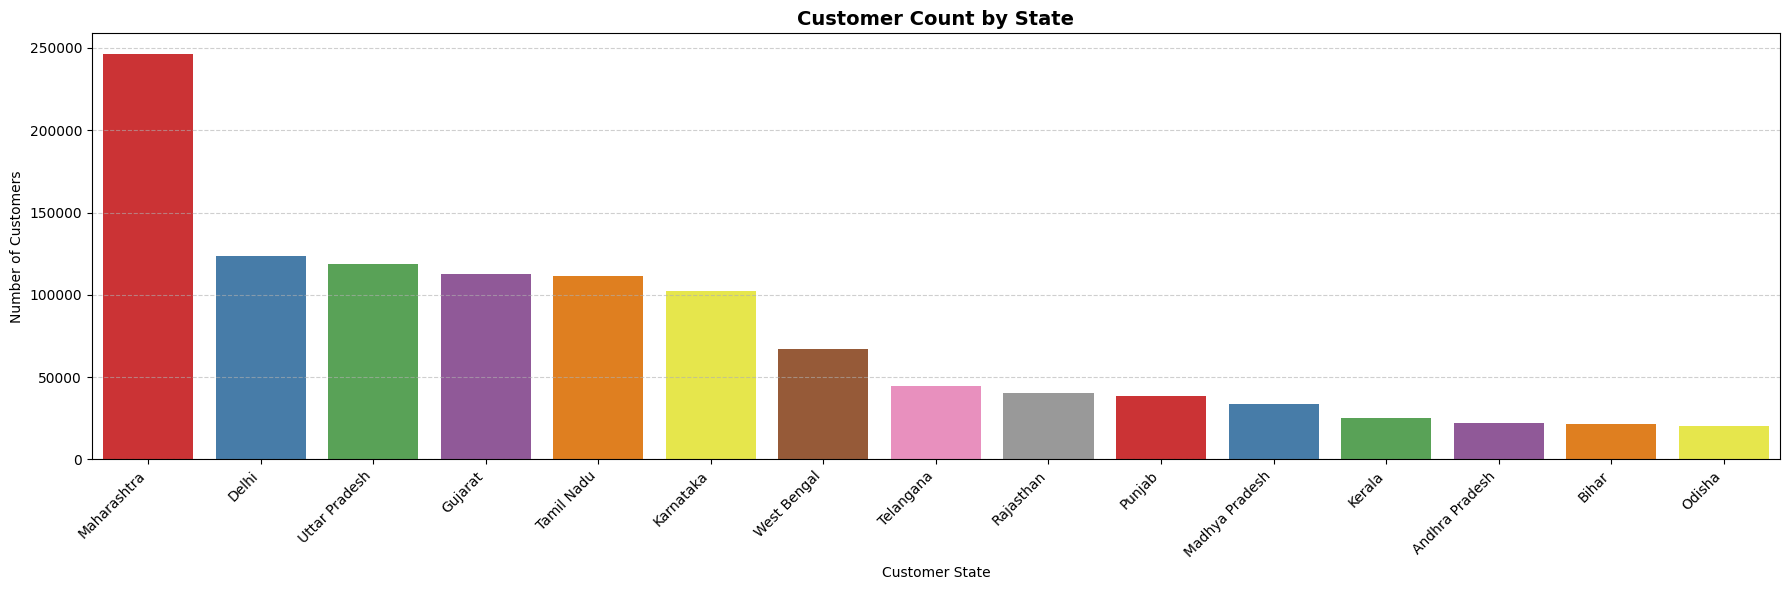

In [18]:
plt.figure(figsize=(18,6))
sns.countplot(data=df,x='Customer State',palette='Set1',order=df['Customer State'].value_counts().index )
plt.ylabel("Number of Customers")
plt.xlabel("Customer State")
plt.title("Customer Count by State", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

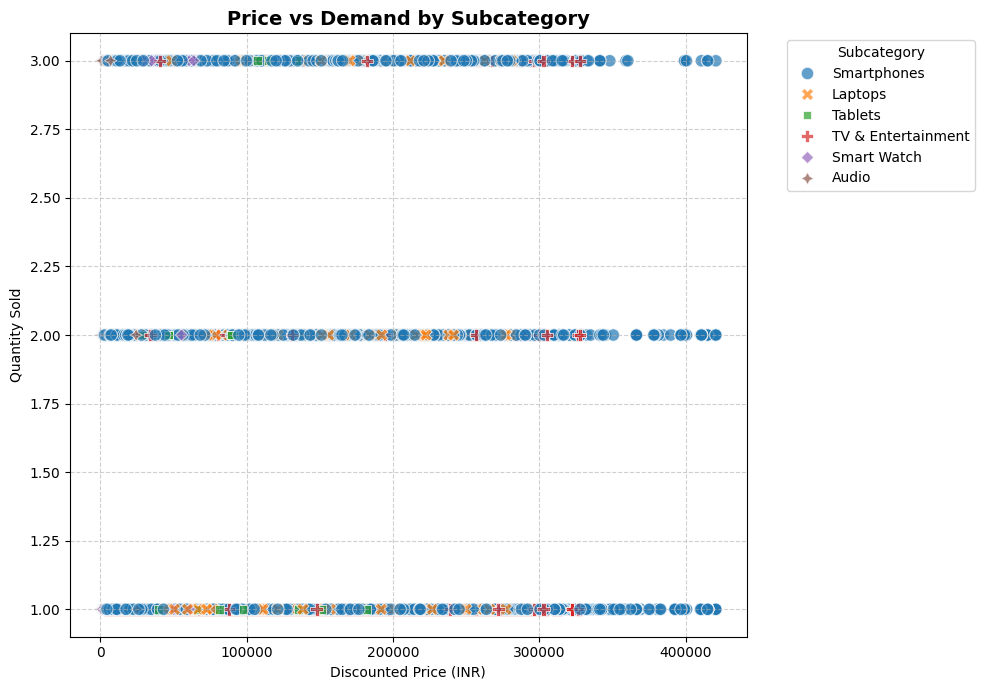

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='Discounted Price Inr',y='Quantity',hue='Subcategory',style='Subcategory', alpha=0.7, s=80 )
plt.title("Price vs Demand by Subcategory", fontsize=14, fontweight="bold")
plt.xlabel("Discounted Price (INR)")
plt.ylabel("Quantity Sold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Subcategory", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Digital Suppliers\AppData\Local\Temp\ipykernel_3328\3205573886.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x='Customer State',y='Delivery Days',hue='Customer Tier',ci=None,palette='Set3')


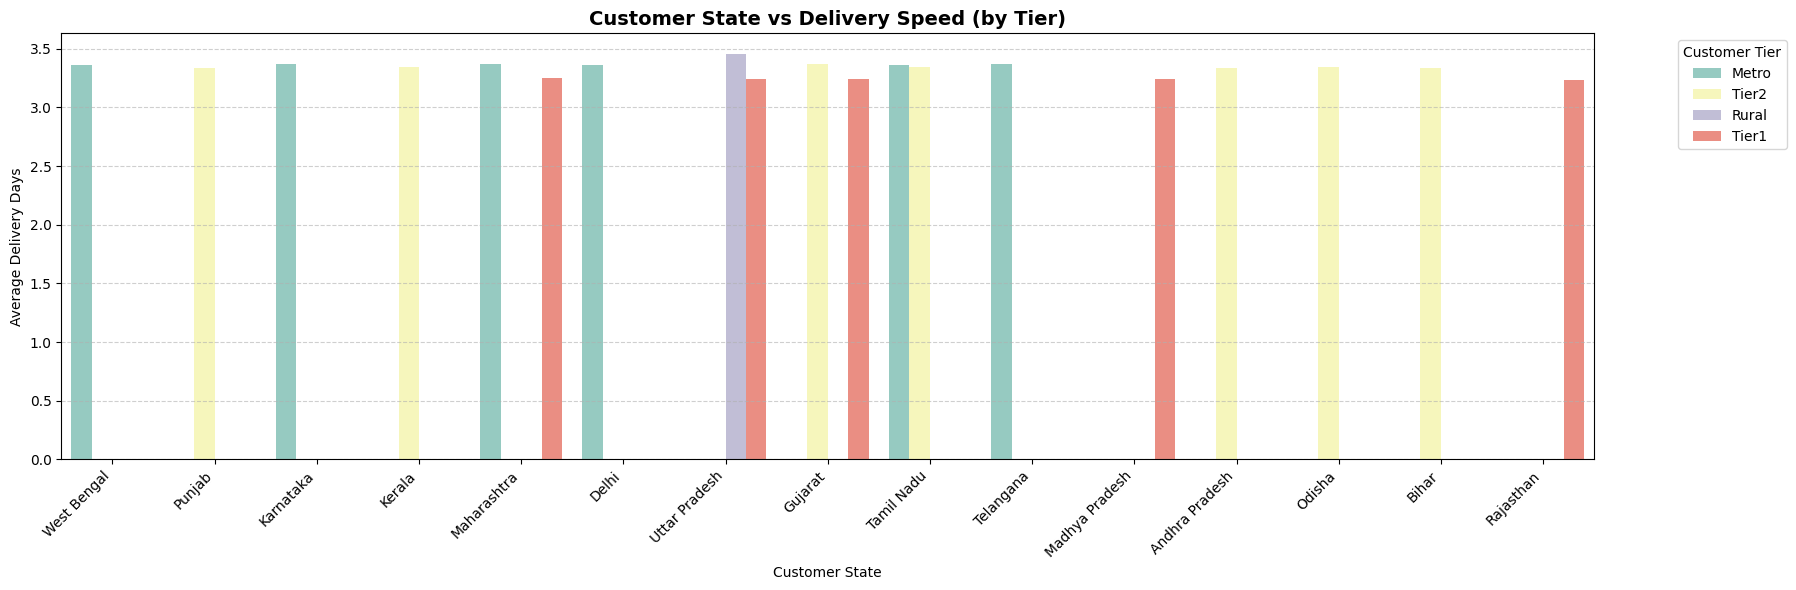

In [21]:
plt.figure(figsize=(18,6))
sns.barplot(data=df,x='Customer State',y='Delivery Days',hue='Customer Tier',ci=None,palette='Set3')
plt.title("Customer State vs Delivery Speed (by Tier)", fontsize=14, fontweight='bold')
plt.xlabel("Customer State")
plt.ylabel("Average Delivery Days")
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.legend(title="Customer Tier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

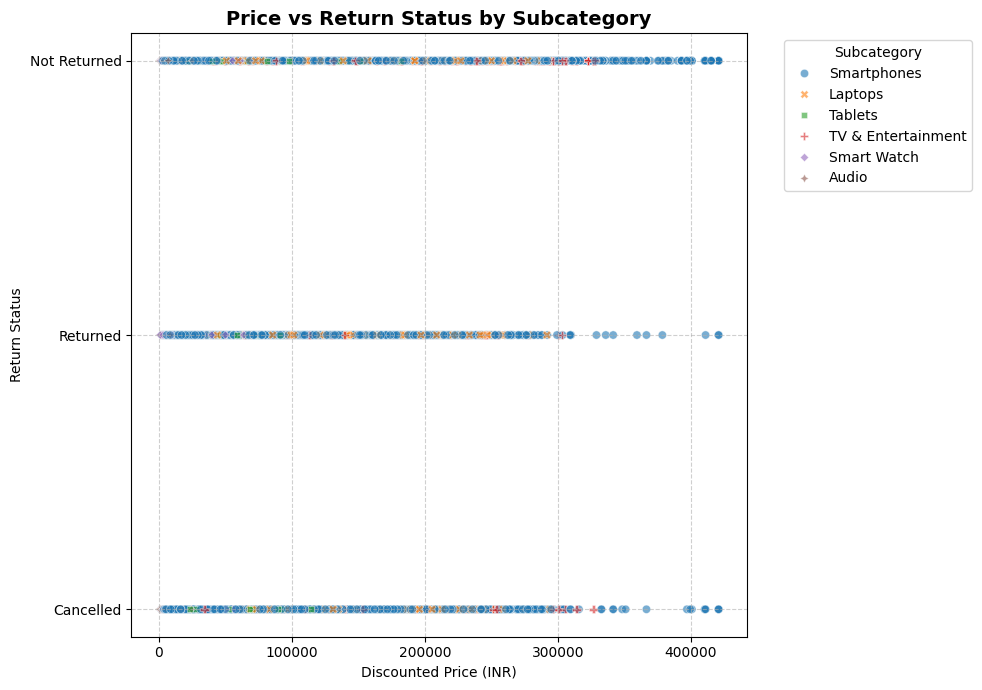

In [22]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='Discounted Price Inr', y='Return Status', hue='Subcategory', alpha=0.6, style='Subcategory')
plt.yticks([0,1,2], ["Not Returned", "Returned", "Cancelled"])
plt.title("Price vs Return Status by Subcategory", fontsize=14, fontweight="bold")
plt.xlabel("Discounted Price (INR)")
plt.ylabel("Return Status")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Subcategory", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Digital Suppliers\AppData\Local\Temp\ipykernel_3328\901555997.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Brand', y='Final Amount Inr', estimator=sum, palette="Set2", ci=None)
C:\Users\Digital Suppliers\AppData\Local\Temp\ipykernel_3328\901555997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Brand', y='Final Amount Inr', estimator=sum, palette="Set2", ci=None)


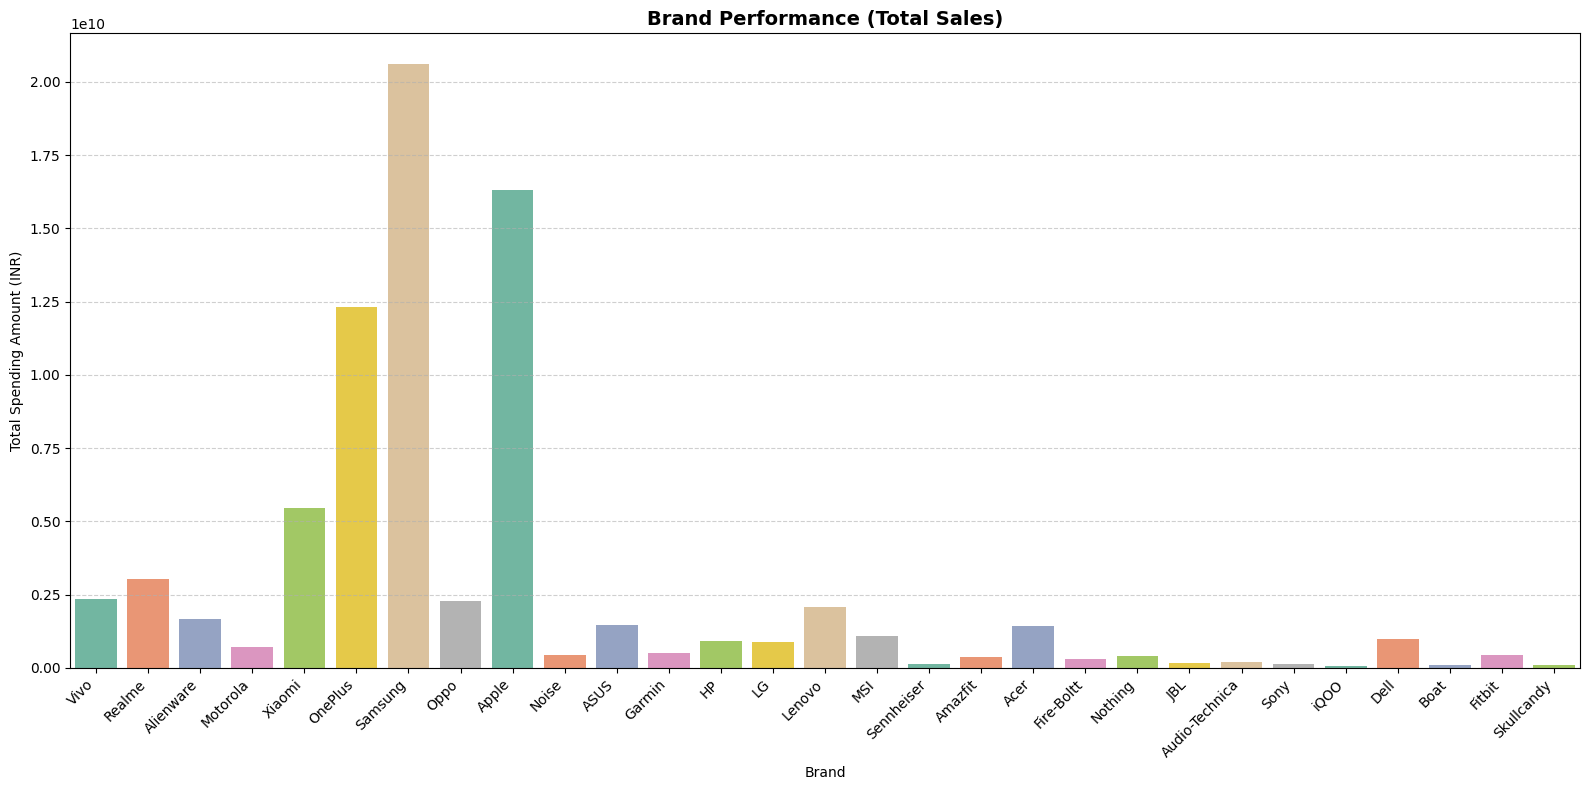

In [23]:
plt.figure(figsize=(16,8))
sns.barplot(data=df, x='Brand', y='Final Amount Inr', estimator=sum, palette="Set2", ci=None)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Brand")
plt.ylabel("Total Spending Amount (INR)")
plt.title("Brand Performance (Total Sales)", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\Digital Suppliers\AppData\Local\Temp\ipykernel_3328\2226182403.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Order Year', y='Final Amount Inr', hue='Subcategory', palette='Set2', estimator=sum, ci=None)


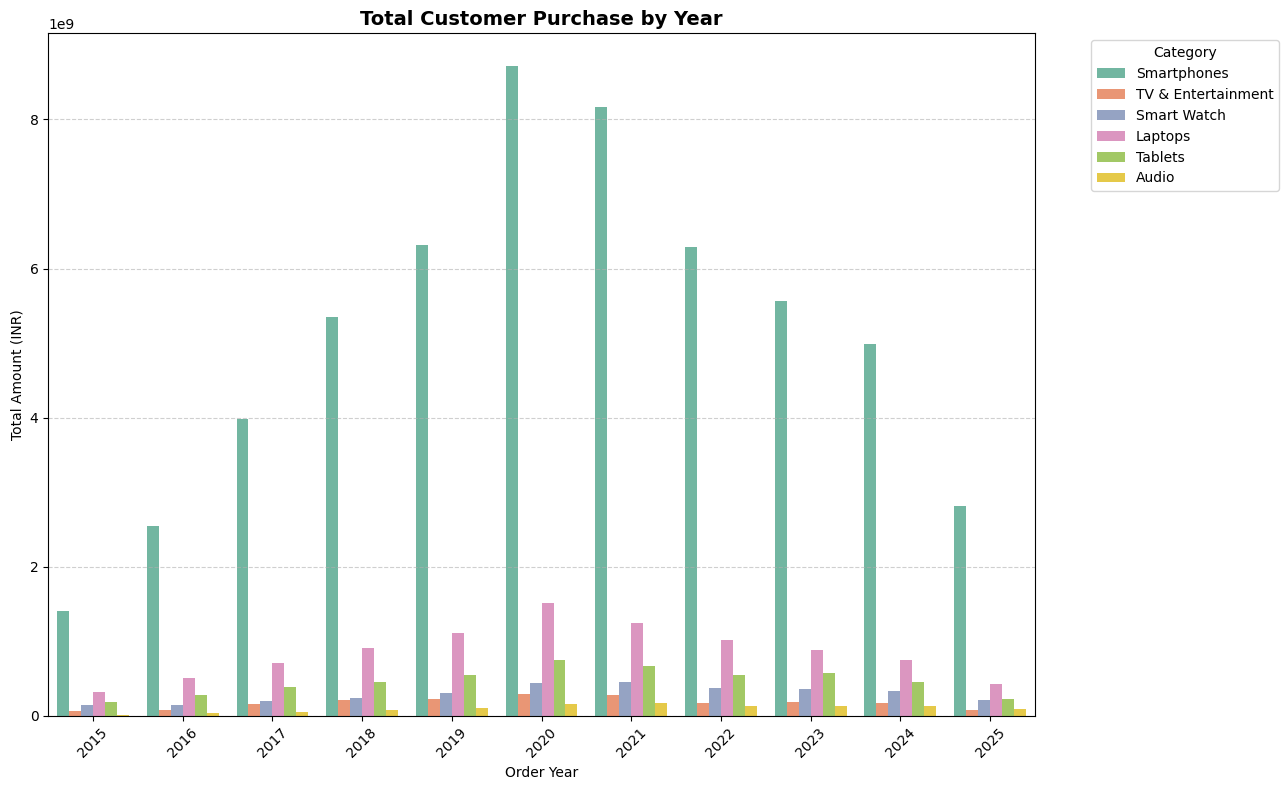

In [24]:
plt.figure(figsize=(13,8))
sns.barplot(data=df, x='Order Year', y='Final Amount Inr', hue='Subcategory', palette='Set2', estimator=sum, ci=None)
plt.title('Total Customer Purchase by Year', fontsize=14, fontweight="bold")
plt.ylabel('Total Amount (INR)')
plt.xlabel('Order Year')
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

c:\Users\Digital Suppliers\Documents\Amazon_Sales\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


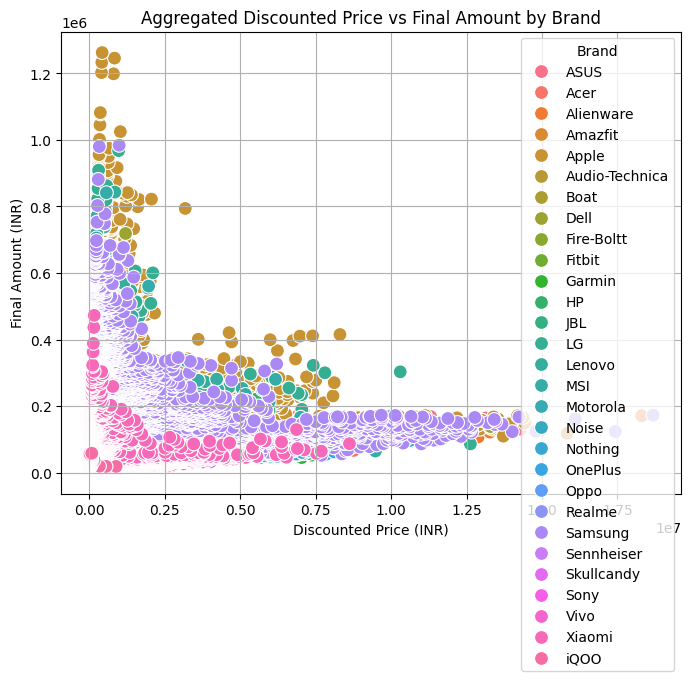

In [25]:
sales_discount = df.groupby(['Brand', 'Final Amount Inr'], as_index=False)['Discounted Price Inr'].sum()

plt.figure(figsize=(8,6))
sns.scatterplot(data=sales_discount, x='Discounted Price Inr', y='Final Amount Inr', hue='Brand', s=100)
plt.title('Aggregated Discounted Price vs Final Amount by Brand')
plt.xlabel('Discounted Price (INR)')
plt.ylabel('Final Amount (INR)')
plt.grid(True)
plt.show()

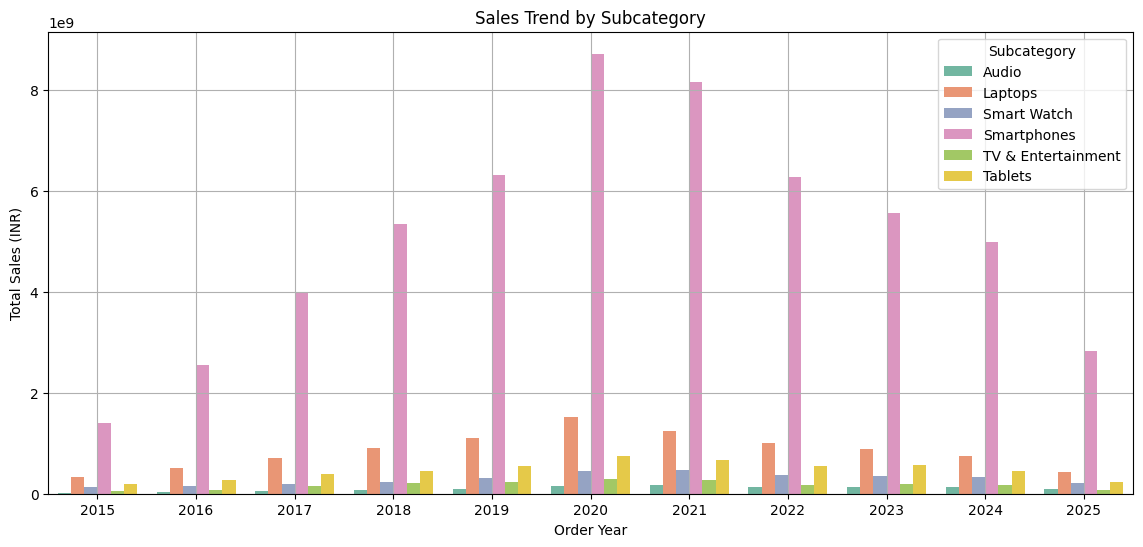

In [26]:
year_sales = df.groupby(['Order Year', 'Subcategory'])['Final Amount Inr'].sum().reset_index()
plt.figure(figsize=(14,6))
sns.barplot(data=year_sales, x='Order Year', y='Final Amount Inr', hue='Subcategory', palette='Set2')
plt.title('Sales Trend by Subcategory')
plt.xlabel('Order Year')
plt.ylabel('Total Sales (INR)')
plt.grid(True)
plt.show()